In [3]:
%autosave 10

Autosaving every 10 seconds


In [4]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
%matplotlib inline

**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [14]:

df = pd.read_csv('cleaned_data.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [15]:
#checking imbalance
df.groupby('default payment next month')['ID'].count(),df['default payment next month'].mean()

(default payment next month
 0    20750
 1     5914
 Name: ID, dtype: int64,
 0.2217971797179718)

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

In [30]:
df[['LIMIT_BAL','default payment next month']]

,LIMIT_BAL,default payment next month
0,20000,1
1,120000,1
2,90000,0
3,50000,0
4,50000,0
...,...,...
26659,220000,0
26660,150000,0
26661,30000,1
26662,80000,1


In [31]:
X  = df['LIMIT_BAL'].values.reshape(-1,1)
Y = df['default payment next month'].values

In [38]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=400)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [39]:
logistic_model.fit(X_train,Y_train)

LogisticRegression()

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [40]:
ypredict_value = logistic_model.predict(X_test)
ypredict_value

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
ypredict_prob = logistic_model.predict_proba(X_test)
ypredict_prob


array([[0.53427151, 0.46572849],
       [0.72334384, 0.27665616],
       [0.85630297, 0.14369703],
       ...,
       [0.92690387, 0.07309613],
       [0.82905791, 0.17094209],
       [0.73686934, 0.26313066]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [48]:
from sklearn import metrics
metrics.roc_auc_score(Y_test,ypredict_prob[:,1])

0.6279314698246737

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

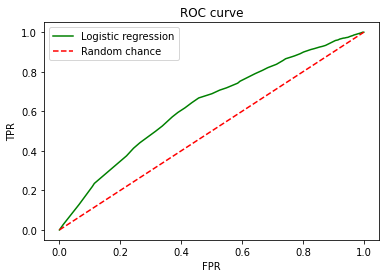

In [52]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test,ypredict_prob[:,1])
plt.plot(fpr, tpr, 'g-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [55]:
precision,recall,thresold = metrics.precision_recall_curve(Y_test,ypredict_prob[:,1])


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precision-Recall Curve')

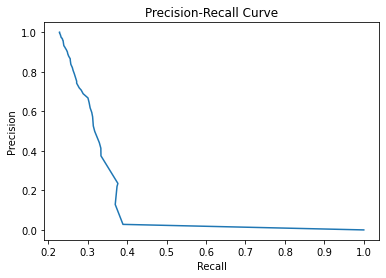

In [59]:
plt.plot(precision,recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [61]:
metrics.auc(recall,precision)

0.32600151826050916

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [62]:

ytrain_predict= logistic_model.predict(X_train)
ytrain_predict_prob = logistic_model.predict_proba(X_train)

metrics.roc_auc_score(Y_train,ytrain_predict_prob[:,1])

0.6146326596096737

    How is this different, conceptually and quantitatively, from your earlier calculation?
